# SMS Spam Classification

In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
69,ham,I plane to give on this month end.,NaN,NaN,NaN
1759,ham,Do u ever get a song stuck in your head for no...,NaN,NaN,NaN
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...,NaN,NaN,NaN
2131,ham,S...from the training manual it show there is ...,NaN,NaN,NaN
4968,ham,I will cme i want to go to hos 2morow. After t...,NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

**Now lets start working with the data and make some amazing conclusions**

## 1. Data Cleaning
## 2. EDA
## 3. Data Preprocessing --vectorization,stemming,remove stop words
## 4. Model Building
## 5. Evaluate the model
## 6. Improve the model
## 7. Website
## 8. Deployment on Heroku


# 1. Data Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# the above information shows that columns 2 3 4 have too much null values so it is good to drop it
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
#inplace= True because we permanently want to bring change in the original dataset
df.sample(5)

,v1,v2
2337,ham,Tell your friends what you plan to do on Valen...
2270,ham,U know we watchin at lido?
3156,ham,Havent shopping now lor i juz arrive only
191,ham,I'm sorry. I've joined the league of people th...
3431,spam,Camera - You are awarded a SiPix Digital Camer...


In [18]:
# as the column names are not to descriptive lets rename the names of the columns
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [19]:
df.sample(5)

,message_type,message
2514,ham,Ok ill send you with in &lt;DECIMAL&gt; ok.
3153,spam,Not heard from U4 a while. Call 4 rude chat pr...
3111,ham,Just haven't decided where yet eh ?
4841,ham,"Awesome, that gonna be soon or later tonight?"
870,ham,"Well am officially in a philosophical hole, so..."


In [20]:
# in the message type, they are classified as 'ham' and 'spam' but we want it as 1 and O so lets import Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [22]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

1194    0
3891    1
2987    0
5325    0
3268    0
Name: message_type, dtype: int64

In [23]:
df[df['message_type']==1]
# there are 747 spam messages in the dataset

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [24]:
#now lets check the missing values
df.isnull().sum()
# there are no missing values

message_type    0
message         0
dtype: int64

In [25]:
# now lets check for duplicated values
df.duplicated().sum()


403

*There are 403 duplicate values so we simply have to remove those values* 

In [26]:
#remove the duplicates
df= df.drop_duplicates()

In [27]:
df.duplicated().sum()

0

# 2. Exploratory Data Analysis

### *Lets visualize this classification problem to get a better understanding of the data*

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

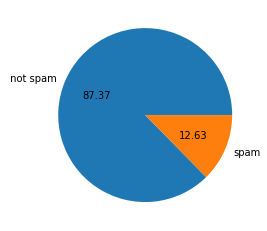

In [30]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

### there is imbalance in data

In [31]:
# no. of alphabets in the data
# no. of sentences in the data
# no. of words in the data

### *Now lets make 3 new columns in the data depicting the no. of characters,words and sentences*

In [32]:
#natural language tool kit
import nltk

In [33]:
#find the number of alpha numeric characters in the messages column
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
#fetch number of words using NLTK
from nltk.tokenize import word_tokenize
#word tokenization
df['message'].apply(lambda x: nltk.word_tokenize(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/riyaparikh/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
#now find the length of each of the list to get the total number of words in each list
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

In [ ]:
#finding number of sentences
df['num_sentences']=df['message'].apply(lambda x: nltk.sent_tokenize(x))
df.sample(5)

In [ ]:
#finding no. of sentences
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

In [ ]:
#lets test the describe function on the new 3 columns
df[['num_characters','num_words','num_sentences']].describe()

### For 'ham' messages

In [ ]:
# lets check describe() for both ham and spam individually
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

### For 'spam' messages

In [ ]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()


#### we can clearly see the spam messages are quite longer than the ham messages

In [ ]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')


In [ ]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

In [ ]:
#plot pairplots for ham and spam
sns.pairplot(df,hue='message_type')

In [ ]:
#find correlation
df.corr()

In [ ]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

*As we see multicollinearity here, we cannot use all three columns instead we shall use only one and that should be mun_characters has it has highest correlation with message_type*

# 3. Data Preprocessing

### 3.1 LowerCase
### 3.2 Tokenisation
### 3.3 Removing special characters
### 3.4 Removing stop words and punctuation
### 3.5 Stemming --lemmetization

In [ ]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)#tokenization  and after that text is converted to a list
    #so we run a loop in the message text
    y=[] #creating empty list to append
    for i in message:
        if i.isalnum():
            y.append(i)
    #now lets assign the y list back to the message
    #message = y   !!!!list can never be copied this way it is immutable data type so we have to do it by CLONING
    message=y[:]
    y.clear() #now y is cleared
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    ##now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)#returns in the form of string

In [ ]:
text_transform("THis is a SMS spam CLassifier playing,wasn't $3000") ##see here the special character $ is ignored , no stopwords and no punctuation

In [ ]:
## Removing stop words and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) #length of stopwords available



*This shows there are 179 stopwords in the english language in this library*

In [ ]:
#now for punctuation
import string
string.punctuation

In [ ]:
##stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('playing')

#we got the stemmed version of the word

## Now lets apply the *text_transform* function to all the messages in the dataset

In [ ]:
df['message'].apply(text_transform)

In [ ]:
df['transformed_msg']=df['message'].apply(text_transform)

In [ ]:
df.head()

### *Now we have to work basically on 2 columns the "transformed_msg" and "message_type"*

# Word Cloud

In [ ]:
#drawing a word cloud of maximum occuring words in the messages
from wordcloud import WordCloud
#create its object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
##word cloud for SPAM
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

In [ ]:
#display the word cloud---SPAM
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [ ]:
## word cloud for ham messages
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=" "))

In [ ]:
#show the wordcloud for ham messages
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)


### Lets find the top 30 words used in Ham and Spam

In [ ]:
##finding the top 30 words used in Ham and spam
##lets write a custom code for this
df[df['message_type']==1]['transformed_msg'].tolist()


In [ ]:
##Lets print all the spam messages
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
       
   

In [ ]:
 len(spam_corpus)

In [ ]:
## now lets find the most occuring words
from collections import Counter
Counter(spam_corpus)

In [ ]:
#Top 30 
Counter(spam_corpus).most_common(30)

In [ ]:
#Add those 30 words in one dataframe
pd.DataFrame(Counter(spam_corpus).most_common(30))

In [ ]:
##plot the barplt
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# Find top 30 words for HAM
ham_corpus=[]
for msg in df[df['message_type']==0]['transformed_msg']:
    for word in msg.split():
        ham_corpus.append(word)


In [ ]:
Counter(ham_corpus).most_common(30)

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

**As it known that on Textual Data Naive Bayes Algorithm works the best hence we will use it but along the way also compare it with different algorithms**

*Input is categorical*
*Output is Numerical*

**but as we know in Naive bayes algorithm the input columns should be numerical so we have to convert(VECTORIZE) the column**

### How to vectorize:
* Bag of Words
* TFIDF
* Word2vec

## Here we will be using BAG OF WORDS

In [ ]:
##Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
## toarray to convert from sparse array to dense array
X=cv.fit_transform(df['transformed_msg']).toarray()

In [ ]:
X.shape

*5169 SMS 6629 words*

In [ ]:
y=df['message_type'].values

***Now we'll do TRAIN TEST SPLIT***

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


**we want to reduce false postives as it is a high precision model**


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))




In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))



**This is an imbalanced data so precision score matters the most**

## Lets try with TFID Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(max_features=3000)

### Done for Model Improvement--> Scaling

In [ ]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()

In [ ]:
X.shape

In [ ]:
y=df['message_type'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


**Here precision is 1 which is very good as there will be no FALSE POSITIVE**

In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))


## We are chosing MNB with TFIDF

### *Lets compare other classification algorithms with MNB*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Improvement

### 5.1 Change the parameter *max_features* in TFIDF
### 5.2 

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
#wb --> write binary
pickle.dump(mnb,open('model.pkl','wb'))